In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data/StudentsPerformance.csv')

#print top 5 coloums from table
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [2]:
# Show basic info
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
# To check which coloumn has null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Q1: What is the average score in each subject?
🔸 Why: To understand subject-wise performance of students.

In [4]:
# 1st method
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
# 2nd method
print("Average Math Score:", df['math score'].mean())
print("Average Reading Score:", df['reading score'].mean())
print("Average Writing Score:", df['writing score'].mean())


Average Math Score: 66.089
Average Reading Score: 69.169
Average Writing Score: 68.054


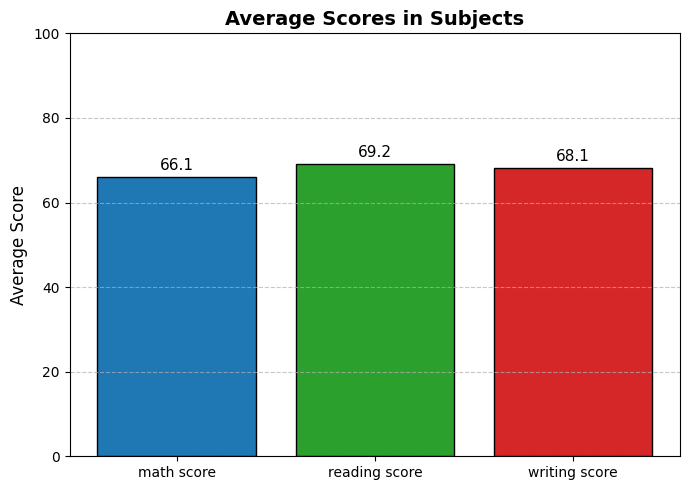

In [6]:
subjects = ['math score', 'reading score', 'writing score']
averages = [df[sub].mean() for sub in subjects]
colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red

plt.figure(figsize=(7, 5))
bars = plt.bar(subjects, averages, color=colors, edgecolor='black')

plt.title('Average Scores in Subjects', fontsize=14, fontweight='bold')
plt.ylabel('Average Score', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1,
             f'{height:.1f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig('images/avg_subject_scores.png')
plt.show()



# Q2: What is the distribution of students' performance based on gender?
🎯 Why this question?
To check if there is any visible performance trend difference between male and female students

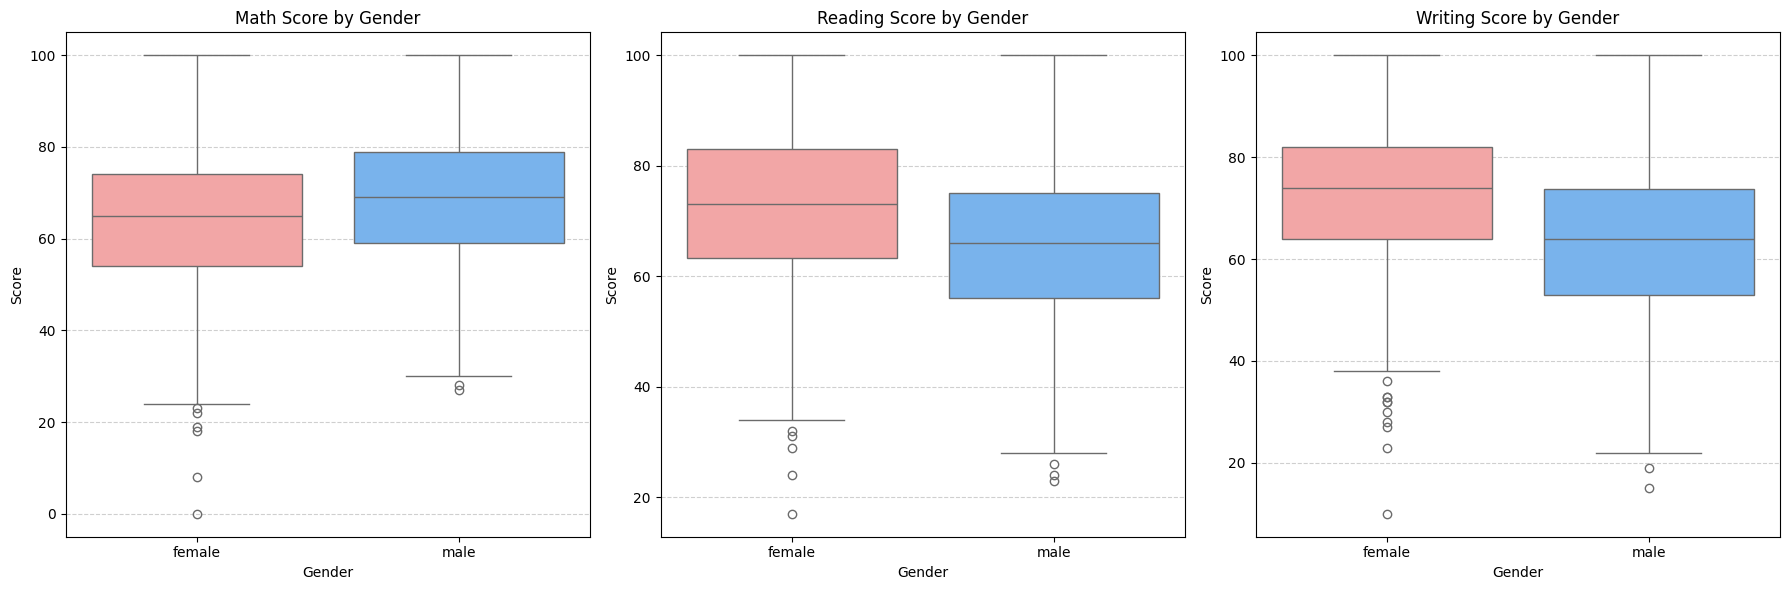

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

subjects = ['math score', 'reading score', 'writing score']
palette = {'female': '#ff9999', 'male': '#66b3ff'}  # 2 colors for 2 genders

for i, subject in enumerate(subjects):
    sns.boxplot(data=df, x='gender', y=subject, ax=axs[i], hue='gender',
                palette=palette, dodge=False, legend=False)
    axs[i].set_title(f'{subject.title()} by Gender')
    axs[i].set_xlabel('Gender')
    axs[i].set_ylabel('Score')
    axs[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('images/subject_scores_by_gender.png')
plt.show()



# Q3: Analyze the impact of test preparation course on student scores
🎯 Goal:
To check if students who completed the test preparation course performed better across subjects.

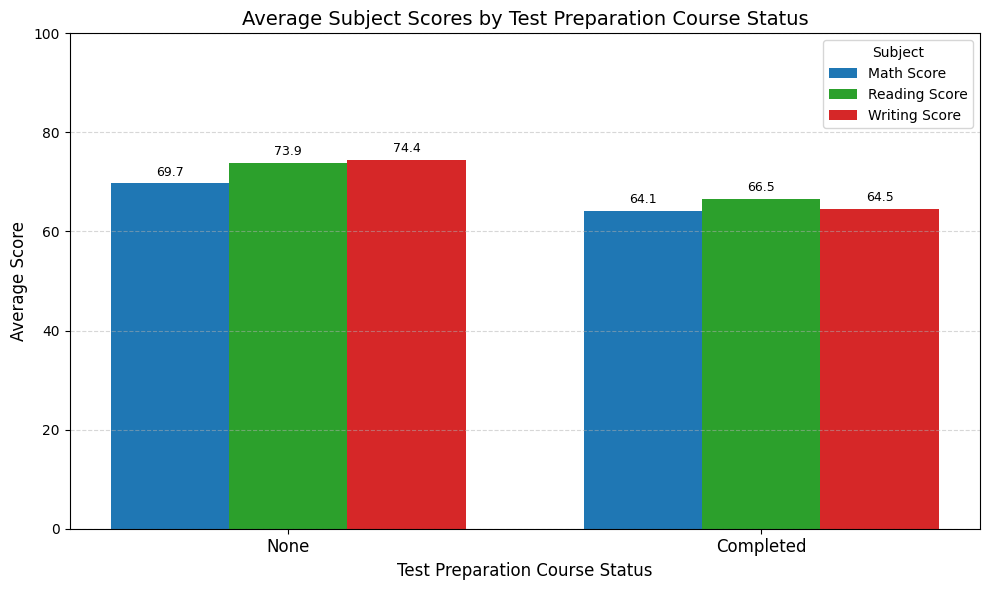

In [13]:
# Calculate average scores grouped by test preparation course status
prep_groups = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

# Set up plot
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for each subject
colors = ['#1f77b4', '#2ca02c', '#d62728']
subjects = ['math score', 'reading score', 'writing score']

# X locations for groups
x = range(len(prep_groups))

# Plotting bars
bar_width = 0.25
for i, subject in enumerate(subjects):
    ax.bar(
        [p + bar_width * i for p in x], 
        prep_groups[subject], 
        width=bar_width, 
        label=subject.title(), 
        color=colors[i]
    )

# Labeling
ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(['None', 'Completed'], fontsize=12)
ax.set_title('Average Subject Scores by Test Preparation Course Status', fontsize=14)
ax.set_xlabel('Test Preparation Course Status', fontsize=12)
ax.set_ylabel('Average Score', fontsize=12)
ax.set_ylim(0, 100)
ax.legend(title='Subject')
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bar values
for i, subject in enumerate(subjects):
    for j, value in enumerate(prep_groups[subject]):
        ax.text(j + bar_width * i, value + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('images/improved_avg_scores_by_test_prep.png')
plt.show()



# Q4: Parental Level of Education vs Student Scores
🔍 Why:
To examine how a student's performance relates to the education level of their parents.

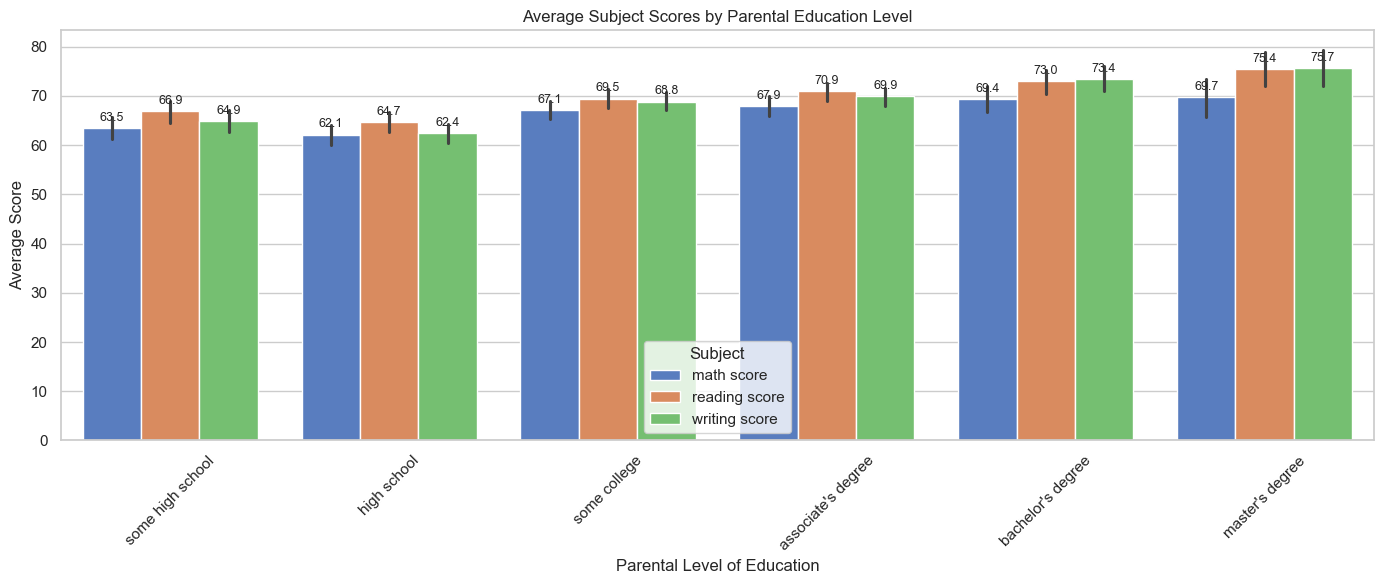

In [18]:
# Melt the dataframe for seaborn
melted_df = df.melt(id_vars='parental level of education',
                    value_vars=['math score', 'reading score', 'writing score'],
                    var_name='Subject', value_name='Score')

# Ensure order is logical
education_order = [
    'some high school', 'high school', 'some college',
    "associate's degree", "bachelor's degree", "master's degree"
]

plt.figure(figsize=(14, 6))
barplot = sns.barplot(
    data=melted_df,
    x='parental level of education',
    y='Score',
    hue='Subject',
    order=education_order,
    palette='muted'
)

# Annotate each bar
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=3)

# Final plot formatting
plt.title('Average Subject Scores by Parental Education Level')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Subject')
plt.tight_layout()
plt.savefig('images/facet_avg_score_parent_edu_annotated.png')
plt.show()



# Q5: Correlation between Math, Reading, and Writing Scores
📊 Why:
To understand how closely the scores in different subjects relate to each other.



In [19]:
# Select only the 3 subject score columns
score_data = df[['math score', 'reading score', 'writing score']]

# Calculate correlation matrix
correlation_matrix = score_data.corr()


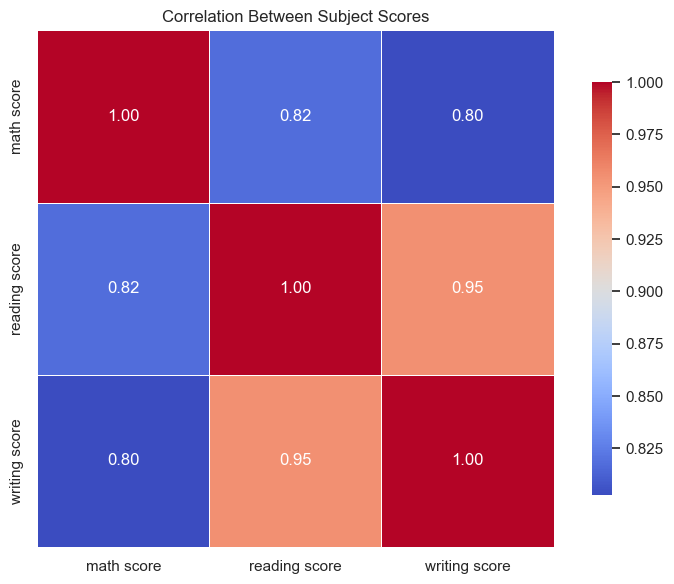

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation Between Subject Scores')
plt.tight_layout()
plt.savefig('images/subject_score_correlation.png')
plt.show()


# Q6: Total Score and Performance Categories

### Step 1: Calculate Total Score & Define Performance Categories

In [24]:
# Calculate total score
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

# Define performance categories based on total score
def categorize_performance(score):
    if score >= 240:
        return 'Excellent'
    elif score >= 180:
        return 'Good'
    elif score >= 120:
        return 'Average'
    else:
        return 'Poor'

df['performance'] = df['total score'].apply(categorize_performance)


### Step 2: Visualize Performance Categories

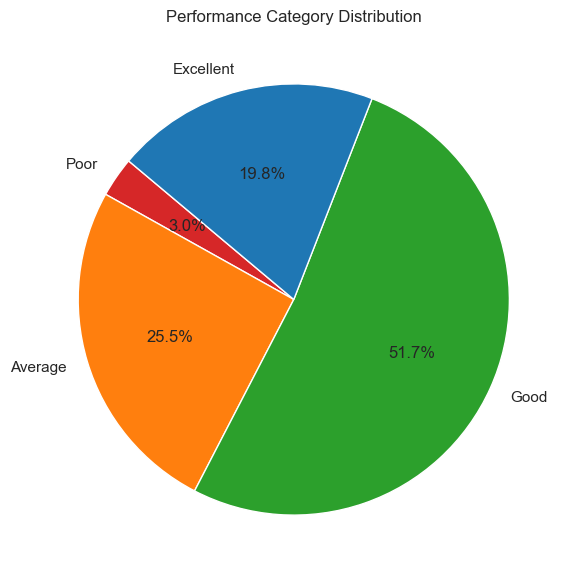

In [28]:
# Count how many students fall into each performance category
performance_counts = df['performance'].value_counts().reindex(['Poor', 'Average', 'Good', 'Excellent'])

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', startangle=140, colors=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4'])
plt.title('Performance Category Distribution')
plt.savefig('images/performance_categories.png')
plt.show()



# Q7: High-performing vs low-performing students

### Step 1: Add a new column classifying students

In [29]:
# Calculate total score if not already done
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

# Define performance groups
def performance_group(score):
    if score >= 240:
        return 'High-performing'
    elif score < 160:
        return 'Low-performing'
    else:
        return 'Mid-performing'

df['performance_group'] = df['total_score'].apply(performance_group)


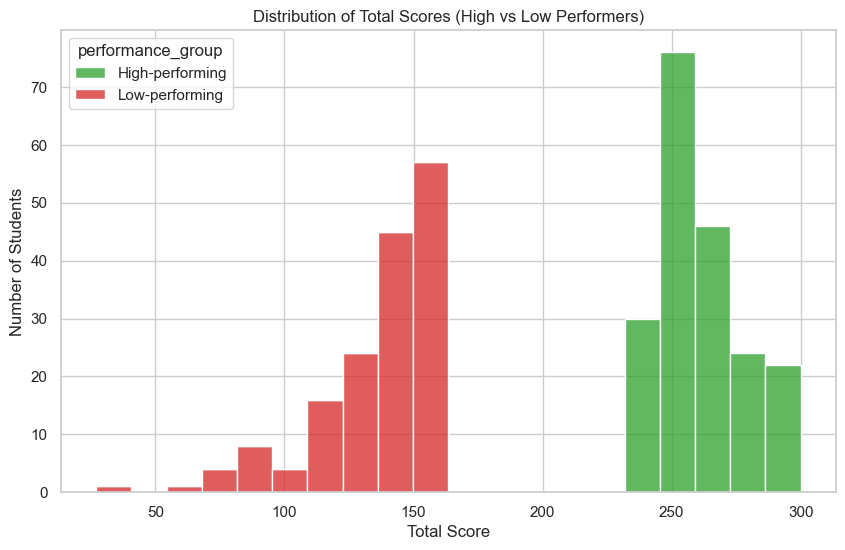

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data=df[df['performance_group'] != 'Mid-performing'], 
             x='total_score', 
             hue='performance_group', 
             multiple='stack', 
             palette={'High-performing': '#2ca02c', 'Low-performing': '#d62728'},
             bins=20)
plt.title('Distribution of Total Scores (High vs Low Performers)')
plt.xlabel('Total Score')
plt.ylabel('Number of Students')
plt.show()

